In [4]:
import os
import numpy as np
from PIL import Image
from form_radiometry import display_image, save_image

## Try rotation

In [5]:
DATA_PROC_DIR = os.path.join("data", "background_lf", "processed")

In [30]:
threshold_image_filename = os.path.join(DATA_PROC_DIR, "bg_intensity_avg_ths_30.tif")
with Image.open(threshold_image_filename) as img:
    rotated_image = img.rotate(-90)

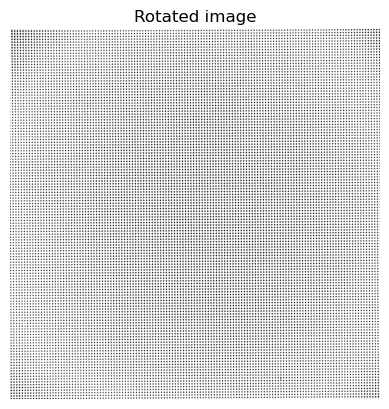

In [31]:
display_image(rotated_image, 'Rotated image')

In [32]:
rotated_filename = os.path.join(DATA_PROC_DIR, "bg_intensity_avg_ths_30_rotated_neg90.tif")
save_image(rotated_filename, np.array(rotated_image))

## Xylem Retardance LF image

In [28]:
ret_filename = os.path.join("data", "lf", "ret_azim", "img_000000000_1_Retardance - Computed Image_000.tif")
with Image.open(ret_filename) as img:
    rotated_ret_image = img.rotate(-90)

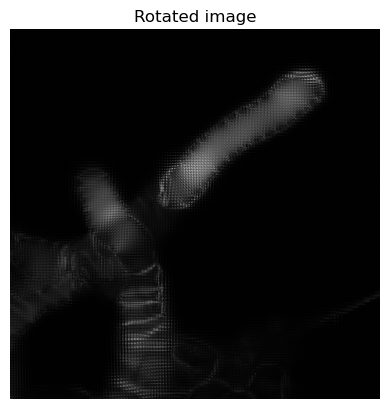

In [29]:
display_image(rotated_ret_image, 'Rotated image')

## Rotate sets of intensity images

In [35]:
data_bg_intensity_dir = os.path.join('data', 'background_lf', 'BG_2023_1110_1759_1', 'Pos0')
intensity_img_filenames = [
    'img_000000000_State0 - Acquired Image_000.tif',
    'img_000000000_State1 - Acquired Image_000.tif',
    'img_000000000_State2 - Acquired Image_000.tif',
    'img_000000000_State3 - Acquired Image_000.tif',
    'img_000000000_State4 - Acquired Image_000.tif'
]
bg_intensity_img_paths = [os.path.join(data_bg_intensity_dir, filename) for filename in intensity_img_filenames]

rotated_data_bg_intensity_dir = os.path.join('data', 'rotneg90', 'raw', 'background_lf', 'BG_2023_1110_1759_1')

In [39]:
def rotate_and_save_images(image_paths, output_dir):
    """
    Rotates a list of images -90 degrees (90 degrees clockwise) and
    saves them to a specified directory.
    
    Parameters:
        image_paths (list of str): List of image file paths to rotate.
        output_dir (str): Output directory where rotated images will be saved.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    for path in image_paths:
        with Image.open(path) as img:
            rotated_img = img.rotate(-90)
            file_name = os.path.basename(path)
            save_path = os.path.join(output_dir, file_name)
            save_image(save_path, np.array(rotated_img).astype(np.uint16))
            print(f"Saved rotated image to {save_path}")

In [41]:
rotate_and_save_images(bg_intensity_img_paths, rotated_data_bg_intensity_dir)

Saved rotated image to data\rotneg90\background_lf\BG_2023_1110_1759_1\img_000000000_State0 - Acquired Image_000.tif
Saved rotated image to data\rotneg90\background_lf\BG_2023_1110_1759_1\img_000000000_State1 - Acquired Image_000.tif
Saved rotated image to data\rotneg90\background_lf\BG_2023_1110_1759_1\img_000000000_State2 - Acquired Image_000.tif
Saved rotated image to data\rotneg90\background_lf\BG_2023_1110_1759_1\img_000000000_State3 - Acquired Image_000.tif
Saved rotated image to data\rotneg90\background_lf\BG_2023_1110_1759_1\img_000000000_State4 - Acquired Image_000.tif


In [44]:
data_lf_slice14_intensity_dir = os.path.join('data', 'lf', 'intensity_slice_14')
intensity_img_slice14_filenames = [
    'img_000000000_State0 - Acquired Image_014.tif',
    'img_000000000_State1 - Acquired Image_014.tif',
    'img_000000000_State2 - Acquired Image_014.tif',
    'img_000000000_State3 - Acquired Image_014.tif',
    'img_000000000_State4 - Acquired Image_014.tif'
]
lf_slice14_intensity_img_paths = [os.path.join(data_lf_slice14_intensity_dir, filename) for filename in intensity_img_slice14_filenames]
rotated_data_lf_slice14_intensity_dir = os.path.join('data', 'rotneg90', 'raw', 'lf_slice14')

In [45]:
rotate_and_save_images(lf_slice14_intensity_img_paths, rotated_data_lf_slice14_intensity_dir)

Saved rotated image to data\rotneg90\lf_slice14\img_000000000_State0 - Acquired Image_014.tif
Saved rotated image to data\rotneg90\lf_slice14\img_000000000_State1 - Acquired Image_014.tif
Saved rotated image to data\rotneg90\lf_slice14\img_000000000_State2 - Acquired Image_014.tif
Saved rotated image to data\rotneg90\lf_slice14\img_000000000_State3 - Acquired Image_014.tif
Saved rotated image to data\rotneg90\lf_slice14\img_000000000_State4 - Acquired Image_014.tif


# Rotate images back 90 degrees

In [1]:
import shutil

In [7]:
def rotate_images_back_and_copy(src_dir, dest_dir):
    """
    Copy all files and directories from src_dir to dest_dir, rotating images by 90 degrees counter-clockwise.
    
    Parameters:
        src_dir (str): The source directory containing images and subdirectories.
        dest_dir (str): The destination directory where rotated images and subdirectories will be stored.
    """
    # Ensure the destination directory exists
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)
    for root, dirs, files in os.walk(src_dir):
        rel_path = os.path.relpath(root, src_dir)
        dest_path = os.path.join(dest_dir, rel_path)
        if not os.path.exists(dest_path):
            os.makedirs(dest_path)

        # Process each file in the current directory
        for file in files:
            src_file_path = os.path.join(root, file)
            dest_file_path = os.path.join(dest_path, file)
            if src_file_path.lower().endswith(('.tif')):
                # Open the image, rotate it, and save it to the destination
                with Image.open(src_file_path) as img:
                    rotated_img = img.rotate(90)
                    rotated_img.save(dest_file_path)
                    save_image(dest_file_path, np.array(rotated_img).astype(np.uint16))
                    print(f"Saved rotated image to {dest_file_path}")
            else:
                shutil.copy(src_file_path, dest_file_path)
                print(f"Copied file to {dest_file_path}")
    print("Files have been copied and images rotated.")

In [5]:
rotneg90_data_dir = os.path.join('data', 'rotneg90', 'rectified')
rotneg90_rect_rot90_data_dir = os.path.join('data', 'rotneg90_rect_rot90')

In [9]:
rotate_images_back_and_copy(rotneg90_data_dir, rotneg90_rect_rot90_data_dir)

Saved rotated image to data\rotneg90_rect_rot90\.\radiometry_rectified.tif
Saved rotated image to data\rotneg90_rect_rot90\background_lf\state0_rectified.tif
Saved rotated image to data\rotneg90_rect_rot90\background_lf\state1_rectified.tif
Saved rotated image to data\rotneg90_rect_rot90\background_lf\state2_rectified.tif
Saved rotated image to data\rotneg90_rect_rot90\background_lf\state3_rectified.tif
Saved rotated image to data\rotneg90_rect_rot90\background_lf\state4_rectified.tif
Saved rotated image to data\rotneg90_rect_rot90\lf_slice14\state0_rectified.tif
Saved rotated image to data\rotneg90_rect_rot90\lf_slice14\state1_rectified.tif
Saved rotated image to data\rotneg90_rect_rot90\lf_slice14\state2_rectified.tif
Saved rotated image to data\rotneg90_rect_rot90\lf_slice14\state3_rectified.tif
Saved rotated image to data\rotneg90_rect_rot90\lf_slice14\state4_rectified.tif
Files have been copied and images rotated.
